In [1]:
import pandas as pd

# Load the data
data = pd.read_csv("AAPL.csv")


In [2]:
# Select features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close']].values
y = data['Volume'].values


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Predict on the testing set
y_pred = model.predict(X_test)


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)


RMSE: 10938647.514930898
MAPE: 17.260181873782454


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
print("Shape of X_train:", X_train.shape)


Shape of X_train: (201, 5)


# Reshape X_train to have 3D shape (number_of_samples, n_steps, number_of_features)
X_train = X_train.reshape(X_train.shape[0], 5, 1)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
y_pred = model.predict(X_test)


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3552649576185856.0000 - val_loss: 3233528942690304.0000
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3614726885998592.0000 - val_loss: 3233527063642112.0000
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3844434621890560.0000 - val_loss: 3233524110852096.0000
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3713157067440128.0000 - val_loss: 3233517131530240.0000
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3646472868331520.0000 - val_loss: 3233504246628352.0000
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3536175692251136.0000 - val_loss: 3233483577098240.0000
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3750489996918784.0000 - val_loss: 3233450022666240.0000
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3611444457242624.0000 - val_loss: 3233404925509632.0000
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3823489140129792.0000 - val_lo

In [18]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (201, 5, 1)
Shape of X_test: (51, 5)


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize each sample in X_train and X_test individually
X_train_scaled = np.array([scaler.fit_transform(sample.reshape(-1, 1)).flatten() for sample in X_train])
X_test_scaled = np.array([scaler.transform(sample.reshape(-1, 1)).flatten() for sample in X_test])


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

# Make predictions
y_pred = model.predict(X_test_scaled)


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3645900563939328.0000 - val_loss: 3233532700786688.0000
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3376437537013760.0000 - val_loss: 3233532700786688.0000
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3719178611589120.0000 - val_loss: 3233532700786688.0000
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3640766735843328.0000 - val_loss: 3233532432351232.0000
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3548345213648896.0000 - val_loss: 3233532432351232.0000
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3698824761573376.0000 - val_loss: 3233532432351232.0000
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3638551338024960.0000 - val_loss: 3233532432351232.0000
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3657964321767424.0000 - val_loss: 3233531895480320.0000
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3713335577018368.0000 - val_lo

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data Distribution:
             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   180.788254  182.230516  179.443690  180.920238  180.471457   
std      9.266687    9.144748    9.207185    9.172632    9.228569   
min    161.220001  162.029999  159.779999  160.100006  159.249985   
25%    173.110005  174.307499  171.874996  173.544999  172.997765   
50%    180.379997  182.079994  178.440002  180.640007  180.048981   
75%    189.277497  189.990005  187.652501  189.317501  188.879902   
max    198.020004  199.619995  197.000000  198.110001  197.857529   

             Volume  
count  2.520000e+02  
mean   5.735253e+07  
std    1.721143e+07  
min    2.404830e+07  
25%    4.678918e+07  
50%    5.340020e+07  
75%    6.203525e+07  
max    1.366826e+08  


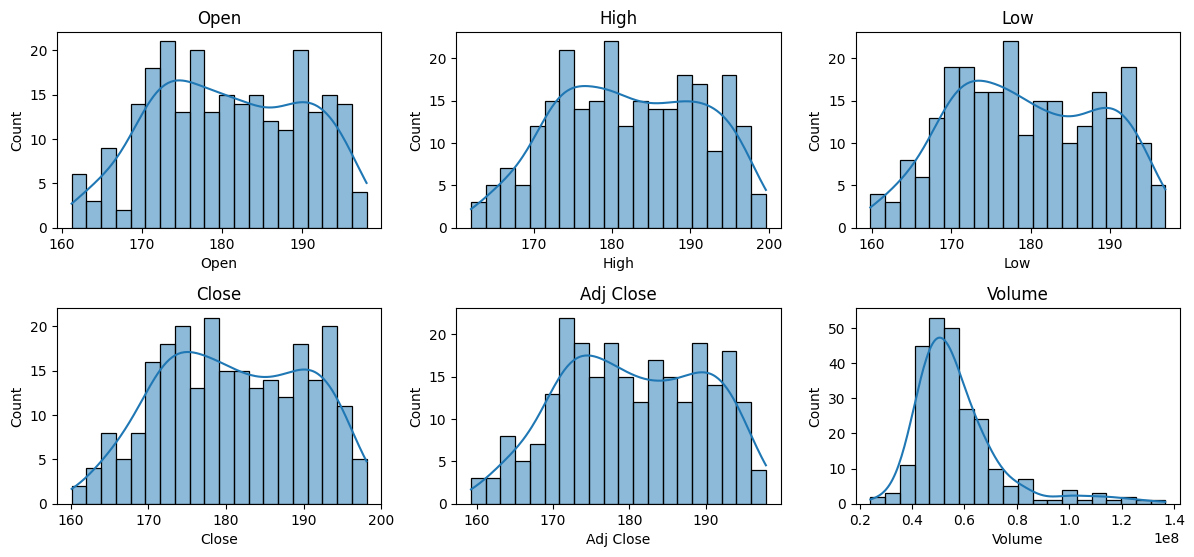


Outliers Detection:


c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\oruga\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

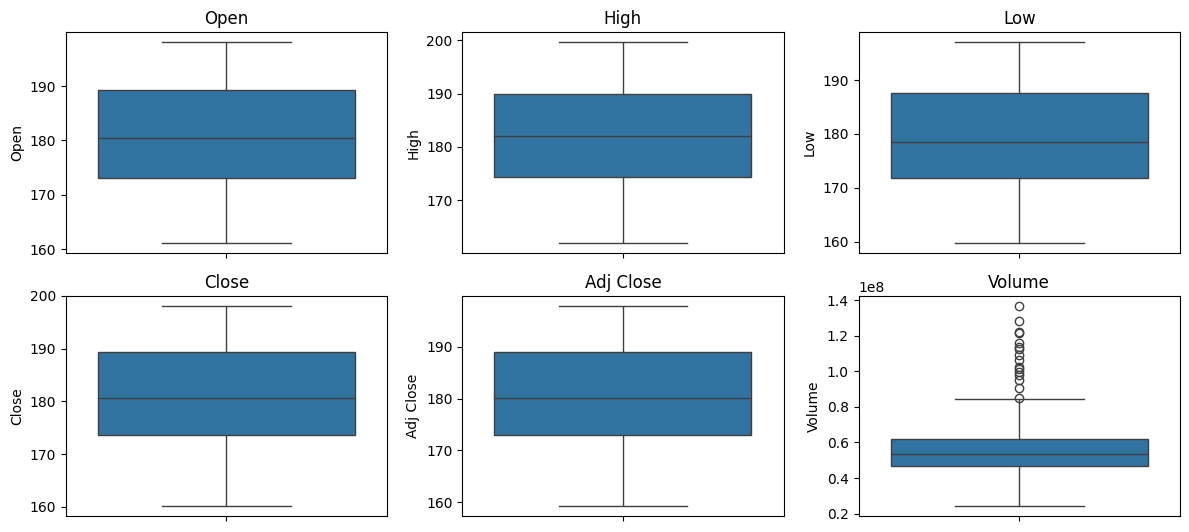


Number of outliers detected: 8


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AAPL.csv')

# Step 1: Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

# Step 2: Visualize Data Distribution
print("\nData Distribution:")
print(df.describe())

# Plot histograms for each numeric feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 3: Check for Outliers
print("\nOutliers Detection:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Calculate z-scores for each numeric feature
z_scores = np.abs((df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] - df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].mean()) / df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].std())

# Threshold for considering a value as an outlier
threshold = 3

# Identify outliers using z-scores
outliers = (z_scores > threshold).any(axis=1)
print("\nNumber of outliers detected:", outliers.sum())

# Step 4: Handle Missing Values
# Since we have no missing values in this dataset, no further action is needed.

# Step 5: Feature Engineering (if necessary)
# For time-series data, you may consider adding lag features or rolling statistics.

# Step 6: Data Preprocessing (if necessary)
# Standardize or normalize the data.

# Now you can proceed with further analysis or model building with the cleaned dataset.


In [24]:
# Identify rows containing outliers
outlier_rows = df[outliers]

# Print the rows containing outliers
print("Rows containing outliers:")
print(outlier_rows)


Rows containing outliers:
           Date        Open        High         Low       Close   Adj Close  \
22   2023-05-05  170.979996  174.300003  170.759995  173.570007  172.648483   
42   2023-06-05  182.630005  184.949997  178.039993  179.580002  178.873627   
84   2023-08-04  185.520004  187.380005  181.919998  181.990005  181.274139   
107  2023-09-07  175.179993  178.210007  173.539993  177.559998  177.100388   
113  2023-09-15  176.479996  176.500000  173.820007  175.009995  174.556992   
177  2023-12-15  197.529999  198.399994  197.000000  197.570007  197.318222   
227  2024-02-29  181.270004  182.570007  179.529999  180.750000  180.750000   
238  2024-03-15  171.169998  172.619995  170.289993  172.619995  172.619995   

        Volume  
22   113316400  
42   121946500  
84   115799700  
107  112488800  
113  109205100  
177  128256700  
227  136682600  
238  121664700  
